# Electronic sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("eletronic_sales.xlsx")
print("Table Head")
df.head()

df.shape
df.info()

Table Head
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         43 non-null     datetime64[ns]
 1   Branch       43 non-null     object        
 2   Sales Agent  43 non-null     object        
 3   Products     43 non-null     object        
 4   Units        43 non-null     int64         
 5   Price        43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [2]:
print("Shape of the dataset")
print("Shape:", df.shape)
print("\n", "==" * 20)
print("Info (data types and nulls\n")
df.info()
print("\n", "==" * 20)
print("Summary statistics\n")
print(df.describe())
print("\n", "==" * 20)
print("Check for missing values\n")
df.isna().sum()

Shape of the dataset
Shape: (43, 6)

Info (data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         43 non-null     datetime64[ns]
 1   Branch       43 non-null     object        
 2   Sales Agent  43 non-null     object        
 3   Products     43 non-null     object        
 4   Units        43 non-null     int64         
 5   Price        43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ KB

Summary statistics

                      Date      Units       Price
count                   43  43.000000   43.000000
mean   2014-12-29 00:00:00  49.325581   20.308605
min    2014-01-06 00:00:00   2.000000    1.290000
25%    2014-07-03 12:00:00  27.500000    3.990000
50%    2014-12-29 00:00:00  53.000000    4.990000
75%    2015-06-25 12:00:00  74.500000  

Date           0
Branch         0
Sales Agent    0
Products       0
Units          0
Price          0
dtype: int64

In [4]:
import pandas as pd
df = pd.read_excel("eletronic_sales.xlsx")
for cols in df.columns:
    print(f"{cols}: {df[cols].nunique()} unique values out of {len(df[cols])}")

Date: 43 unique values out of 43
Branch: 3 unique values out of 43
Sales Agent: 11 unique values out of 43
Products: 5 unique values out of 43
Units: 37 unique values out of 43
Price: 12 unique values out of 43


duplicates: 0


Year,2014,2015
Products,,
Apple,250.00,1450.00
Compaq,1414.94,630.28
Dell,1918.14,2251.73
HP,3766.92,5810.73
Lenovo,1908.34,226.80


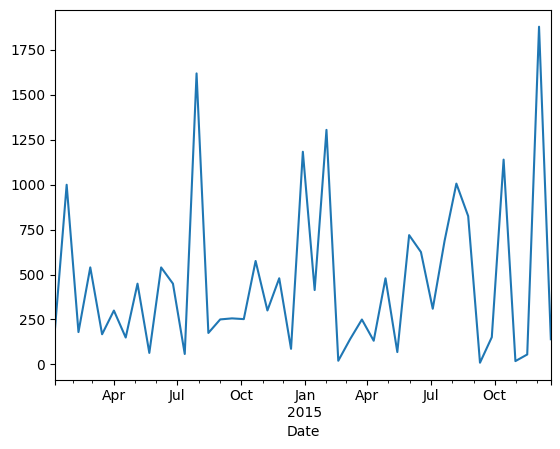

In [5]:

df.dtypes

df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.month_name()
# df = df.drop(columns=['Month_Name'])

df['Price'] = df['Price'].astype(str).str.strip().astype(float)

print(f"duplicates: {df.duplicated().sum()}")

df['Revenue'] = df['Price'] * df['Units']

df.groupby('Date')['Revenue'].sum().plot()

df.groupby('Sales Agent')['Revenue'].sum().nlargest(5)

pivot = pd.pivot_table(df, values='Revenue',
                       index="Products", columns="Year", aggfunc="sum")
pivot

In [4]:
# customer analysis
print("Top 5 Sales Agent")
df.groupby('Sales Agent')['Revennue'].sum().nlargest(5)

top_agent = pd.pivot_table(df, values='Revennue',
                           index='Sales Agent', columns='Year', aggfunc='sum')
print("Agent Sales per Year")
top_agent

Top 5 Sales Agent
Agent Sales per Year


Year,2014,2015
Sales Agent,,
Blessing,2033.70,329.34
Chinedu,336.43,1305.00
Chioma,3102.30,NaN
Emeka,1478.54,1630.90
George,700.82,686.95
Ibrahim,539.73,1210.14
Tolu,628.74,2183.45
Tonye,149.25,289.12
Torbari,57.71,479.04


In [9]:
# monthly / year sales
pd.pivot_table(df, values='Revennue', index='Sales Agent',
               columns='Year', aggfunc='sum')

Year,2014,2015
Sales Agent,,
Blessing,2033.70,329.34
Chinedu,336.43,1305.00
Chioma,3102.30,NaN
Emeka,1478.54,1630.90
George,700.82,686.95
Ibrahim,539.73,1210.14
Tolu,628.74,2183.45
Tonye,149.25,289.12
Torbari,57.71,479.04


Date           0
Branch         0
Sales Agent    0
Products       0
Units          0
Price          0
Revenue        0
dtype: int64


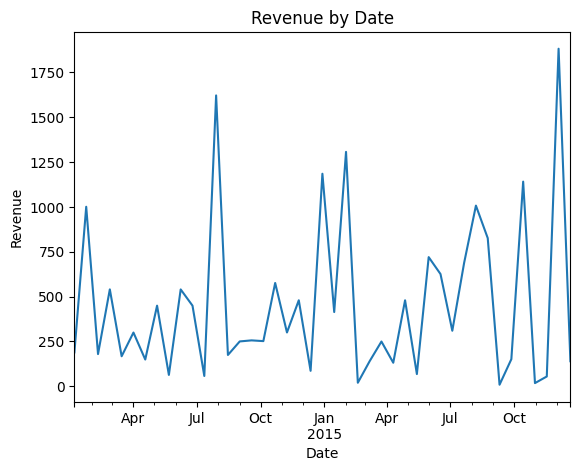

In [10]:
# The required modules and df are already loaded in previous cells, so we don't need to import or reload them.

# Create the Revenue column if it doesn't exist
if 'Revenue' not in df.columns:
	df['Revenue'] = df['Price'] * df['Units']

# Show missing values
print(df.isna().sum())

# Plot revenue by date
df.groupby('Date')['Revenue'].sum().plot()
plt.title("Revenue by Date")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()

<Axes: title={'center': 'Product Analysis'}, xlabel='Products'>

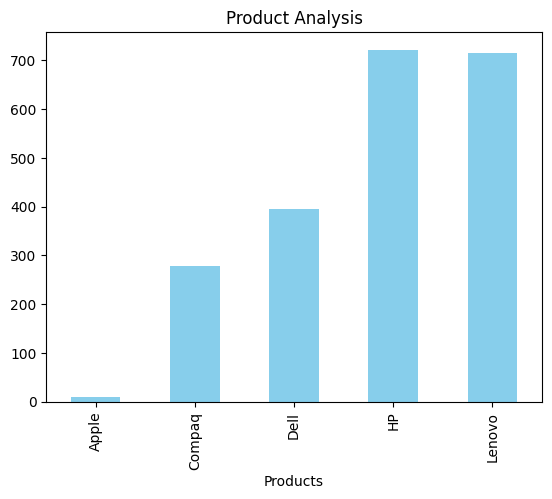

In [5]:
# Product Analysis
df.groupby('Products')['Units'].sum().plot(
    kind='bar', color='skyblue', title="Product Analysis")

<Axes: title={'center': 'Product Revenue Analysis'}, xlabel='Products'>

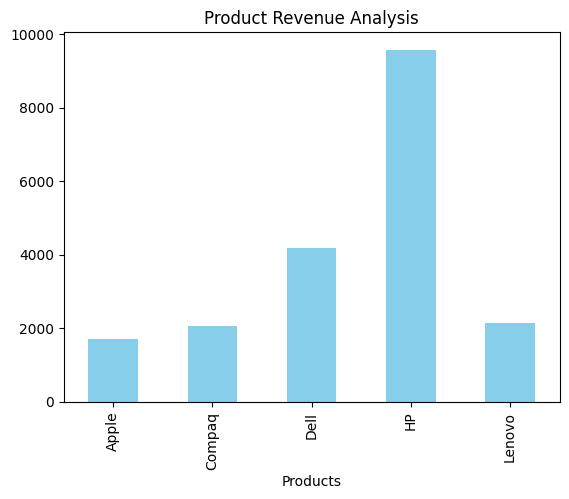

In [11]:
# Most Profitable Products
df.groupby('Products')['Revenue'].sum().plot(
    kind='bar', color='skyblue', title="Product Revenue Analysis")

In [ ]:
# Branch Analysis
branch_summary = df.groupby('Branch')[['Revenue', 'Units', 'Products']].sum()
branch_summary

,Revennue,Units,Products
Branch,,,
GRA,6002.09,691,HPCompaqDellHPLenovoHPHPDellCompaqDellHPLenovo...
Town,2486.72,231,AppleHPLenovoLenovoHPCompaq
Woji,11139.07,1199,AppleAppleLenovoHPLenovoCompaqHPHPLenovoDellHP...
